<a href="https://colab.research.google.com/github/isemotoshota/Prog2kakushin/blob/main/work3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Turtle,OpenCVを実行するために以下を実行する

In [1]:
import numpy as np
import sys
import cv2
from google.colab.patches import cv2_imshow

以下はオセロ8*8マスのを遊ぶことができるものである
ただし、キーボード入力は縦と横それぞれ左上から0～7で入力するようになっている

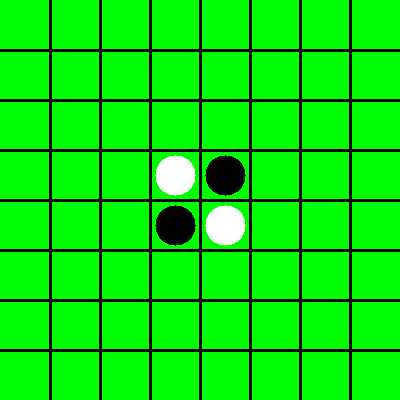

白のターン


In [ ]:
def check(ix,iy):
  dir = [0,0,0,0,0,0,0,0]
  num = [0,0,0,0,0,0,0,0]
  #左方向の処理
  if field[ix-1,iy] == -turn:
    x_tmp = x-2
    y_tmp = y
    while field[x_tmp,y_tmp] == -turn:
      x_tmp -= 1
      num[0] += 1
    if field[x_tmp,y_tmp] == turn:
      dir[0] = 1
  #左上方向の処理
  if field[ix-1,iy-1] == -turn:
    x_tmp = x-2
    y_tmp = y-2
    while field[x_tmp,y_tmp] == -turn:
      x_tmp -= 1
      y_tmp -= 1
      num[1] += 1
    if field[x_tmp,y_tmp] == turn:
      dir[1] = 1
  #上方向の処理
  if field[ix,iy-1] == -turn:
    x_tmp = x
    y_tmp = y-2
    while field[x_tmp,y_tmp] == -turn:
      y_tmp -= 1
      num[2] += 1
    if field[x_tmp,y_tmp] == turn:
      dir[2] = 1
  #右上方向の処理
  if field[ix+1,iy] == -turn:
    x_tmp = x+2
    y_tmp = y-2
    while field[x_tmp,y_tmp] == -turn:
      x_tmp += 1
      y_tmp -= 1
      num[3] += 1
    if field[x_tmp,y_tmp] == turn:
      dir[3] = 1
  #右方向の処理
  if field[ix+1,iy] == -turn:
    x_tmp = x+2
    y_tmp = y
    while field[x_tmp,y_tmp] == -turn:
      x_tmp += 1
      num[4] += 1
    if field[x_tmp,y_tmp] == turn:
      dir[4] = 1
  #右下方向の処理
  if field[ix+1,iy+1] == -turn:
    x_tmp = x+2
    y_tmp = y+2
    while field[x_tmp,y_tmp] == -turn:
      x_tmp += 1
      y_tmp += 1
      num[5] += 1
    if field[x_tmp,y_tmp] == turn:
      dir[5] = 1
  #下方向の処理
  if field[ix,iy+1] ==  -turn:
    x_tmp = x
    y_tmp = y+2
    while field[x_tmp,y_tmp] == -turn:
      y_tmp += 1
      num[6] += 1
    if field[x_tmp,y_tmp] == turn:
      dir[6] = 1
  #左下方向の処理
  if field[ix-1,iy+1] == -turn:
    x_tmp = x-2
    y_tmp = y+2
    while field[x_tmp,y_tmp] == -turn:
      x_tmp -= 1
      y_tmp += 1
      num[7] += 1
    if field[x_tmp,y_tmp] == turn:
      dir[7] = 1
  return dir,num

def judge(dct,rds,jx,jy):
  #ひっくり返す処理
  #左方向の処理
  if dct[0] == 1:
    for s in range(1,rds[0]+1):
      field[jx-s,jy] *= -1
  #左上方向の処理
  elif dct[1] == 1:
    for s in range(1,rds[1]+1):
      field[jx-s,jy-s] *= -1
  #上方向の処理
  elif dct[2] == 1:
    for s in range(1,rds[2]+1):
      field[jx,jy-s] *= -1
  #右上方向の処理
  elif dct[3] == 1:
    for s in range(1,rds[3]+1):
      field[jx+s,jy-s] *= -1
  #右方向の処理
  elif dct[4] == 1:
    for s in range(1,rds[4]+1):
      field[jx+s,jy] *= -1
  #右下方向の処理
  elif dct[5] == 1:
    for s in range(1,rds[5]+1):
      field[jx+s,jy+s] *= -1
  #下方向の処理
  elif dct[6] == 1:
    for s in range(1,rds[6]+1):
      field[jx,jy+s] *= -1
  #左下方向の処理
  elif dct[7] == 1:
    for s in range(1,rds[7]+1):
      field[jx-s,jy+s] *= -1

img = np.zeros((400,400,3),np.uint8)
target_color = (0,0,0)
change_color = (0,255,0)
h,w = img.shape[:2]
for s in range(h):
  for t in range(w):
    b,g,r = img[s,t]
    if (b,g,r) == target_color:
      img[s,t] = change_color
for i in range(7):
  n = (i+1)*50
  cv2.line(img,pt1=(n,0),pt2=(n,400),color=(0,0,0),thickness=2)
  cv2.line(img,pt1=(0,n),pt2=(400,n),color=(0,0,0),thickness=2)
n = 1
white = 0
black = 0
field = np.zeros((8,8,))
field[3,3] = 1
field[4,4] = 1
field[3,4] = -1
field[4,3] = -1
for p in range(8):
  for q in range(8):
    P = p*50+25
    Q = q*50+25
    if field[p,q] == 1:
      cv2.circle(img,center=(P,Q),radius=(20),color=(255,255,255),thickness=-1)
    elif field[p,q] == -1:
      cv2.circle(img,center=(P,Q),radius=(20),color=(0,0,0),thickness=-1)
cv2_imshow(img)
while True :
  dir = [0,0,0,0,0,0,0,0]
  if n%2 == 1 :
    turn = 1
    print('白のターン')
  else :
    turn = -1
    print('黒のターン')
  y = int(input('縦：'))
  x = int(input('横：'))
  if field[x,y] != 0:
    print('既に埋まっているマスです')
    continue
  elif 0 > x or 0 > y or 8 <= x or 8 <= y:
    print('範囲外です')
    continue
  if n%2 == 1 :
    field[x,y] = 1
  else :
    field[x,y] = -1
  fwd,rad = check(x,y)
  if 1 not in fwd:
    print('置くことができないマスです')
    continue
  judge(fwd,rad,x,y)
  for p in range(8):
    for q in range(8):
      P = p*50+25
      Q = q*50+25
      if field[p,q] == 1:
        white += 1
        cv2.circle(img,center=(P,Q),radius=(20),color=(255,255,255),thickness=-1)
      elif field[p,q] == -1:
        black += 1
        cv2.circle(img,center=(P,Q),radius=(20),color=(0,0,0),thickness=-1)
  n += 1
  cv2_imshow(img)
  result = 0 in field
  if result == False:
    print(f'白{white}個')
    print(f'黒{black}個')
    if white > black:
      print('白の勝ち！')
    elif white < black:
      print('黒の勝ち！')
    else :
      print('引き分け')
    break
